In [62]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [63]:
df = pd.read_csv(r"C:\Users\admin\Desktop\Excelr Assignments\Assignment 10\crime_data.csv")
df

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [64]:
df.shape

(50, 5)

In [65]:
df.rename({'Unnamed: 0':'States'}, axis=1, inplace=True)
df

,States,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   States    50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [67]:
#check for missing values

In [68]:
df.isna().sum()

States      0
Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

<AxesSubplot:>

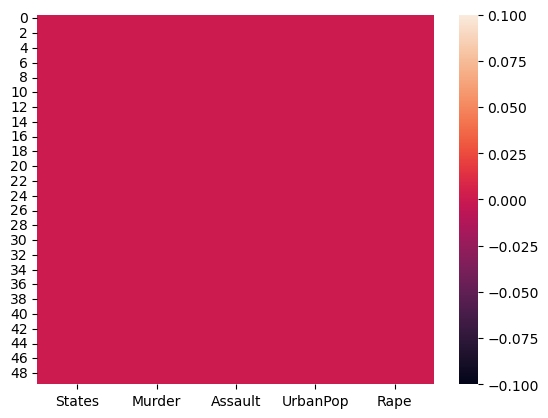

In [69]:
cols = df.columns
sns.heatmap(df[cols].isnull())     

In [70]:
df[df.duplicated()]


,States,Murder,Assault,UrbanPop,Rape


In [71]:
# no duplicate values

In [72]:
df.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Murder Rate'}, xlabel='Murder', ylabel='Density'>

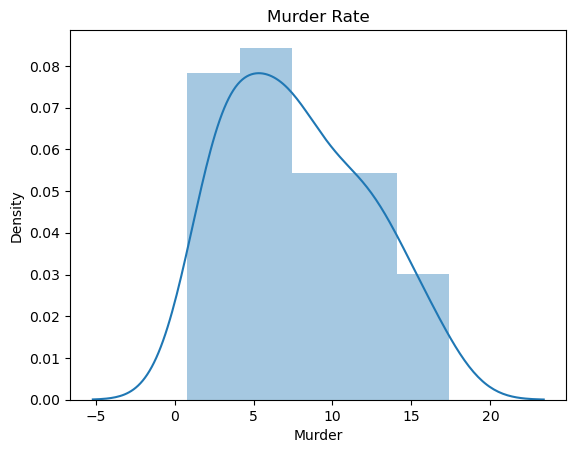

In [73]:
plt.title('Murder Rate')
sns.distplot(df.Murder)

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Assault Rate'}, xlabel='Assault', ylabel='Density'>

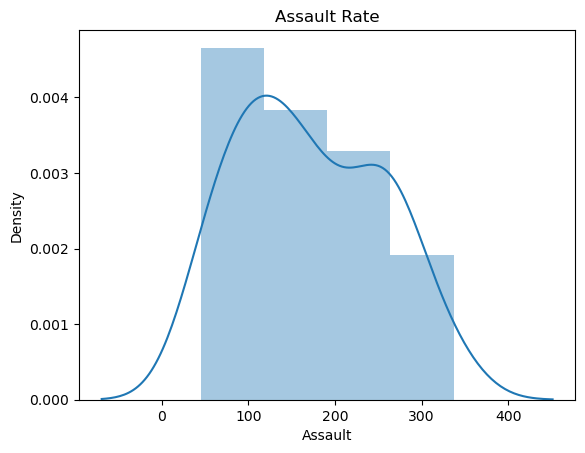

In [74]:
plt.title('Assault Rate')
sns.distplot(df.Assault)

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Urban Population'}, xlabel='UrbanPop', ylabel='Density'>

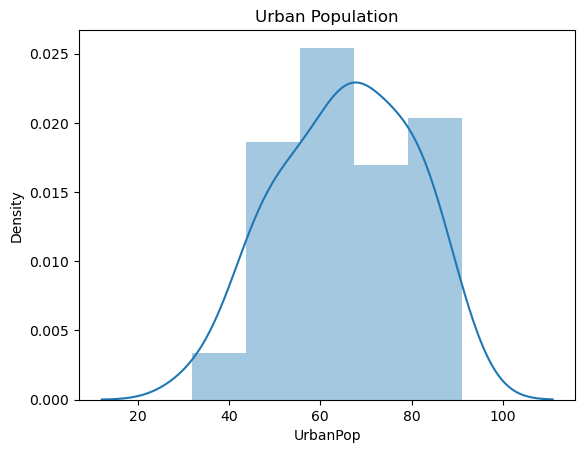

In [75]:

plt.title('Urban Population')
sns.distplot(df.UrbanPop)

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Rape Rate'}, xlabel='Rape', ylabel='Density'>

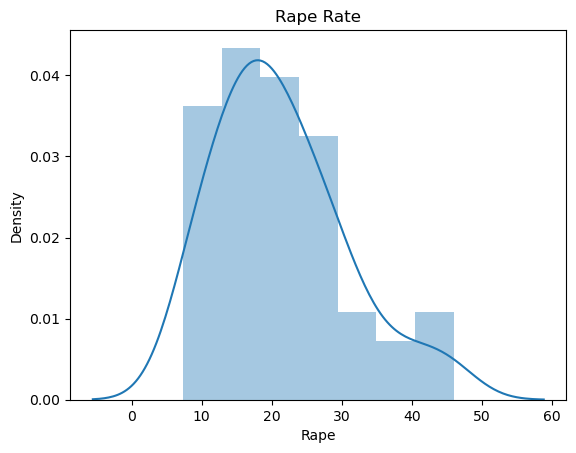

In [76]:
plt.title('Rape Rate')
sns.distplot(df.Rape)  

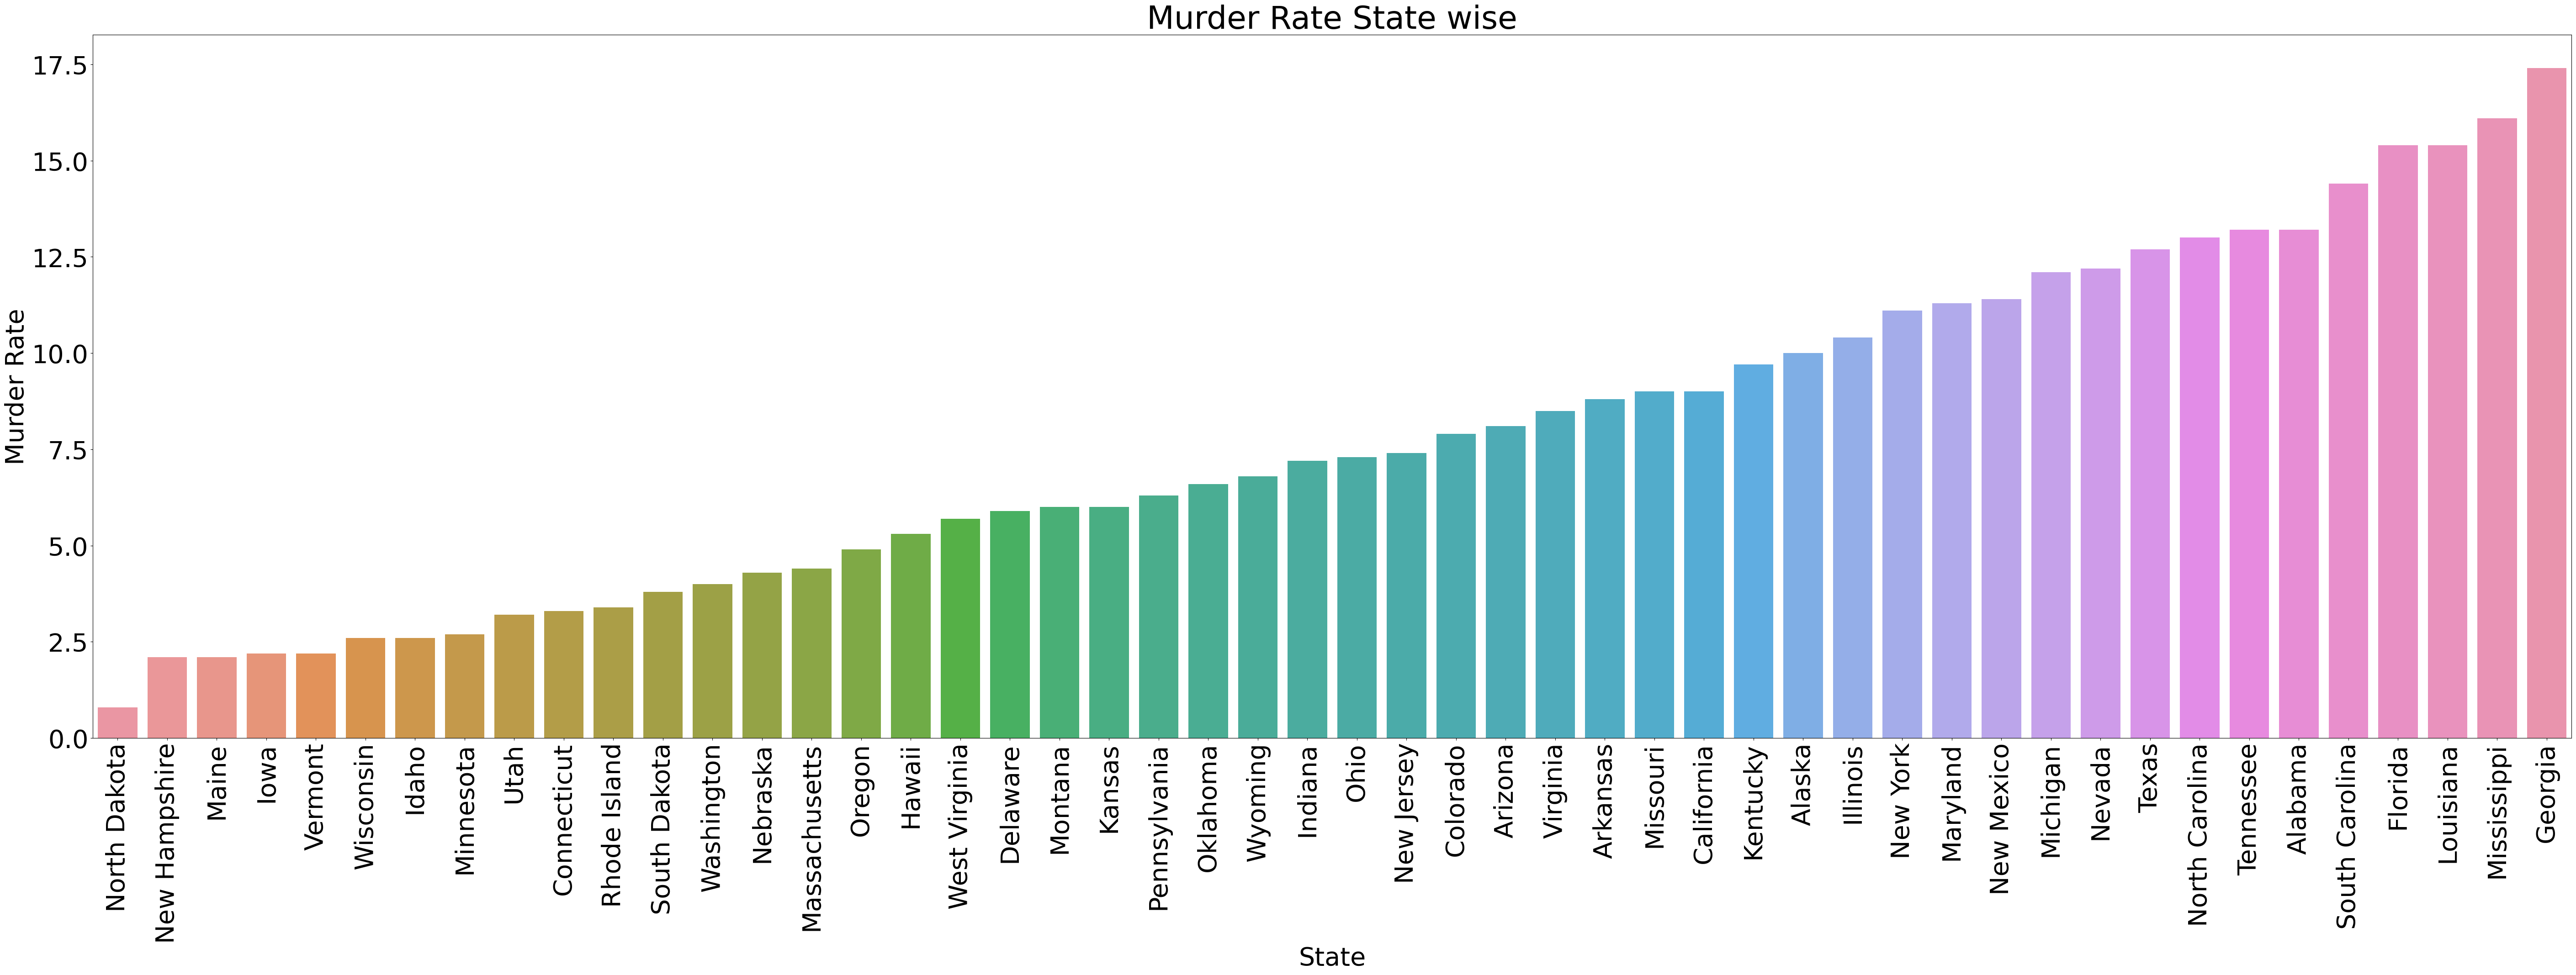

In [77]:
plt.figure(figsize=(70,20))
plt.yticks(rotation = 0, fontsize = 40)
plt.xticks(rotation = 90, fontsize = 40)
sns.barplot(x=df.States, y = df.Murder, order=df.sort_values('Murder').States)
plt.xlabel('State', size=40)
plt.ylabel('Murder Rate', size=40)
plt.title('Murder Rate State wise', size=50)
plt.show()

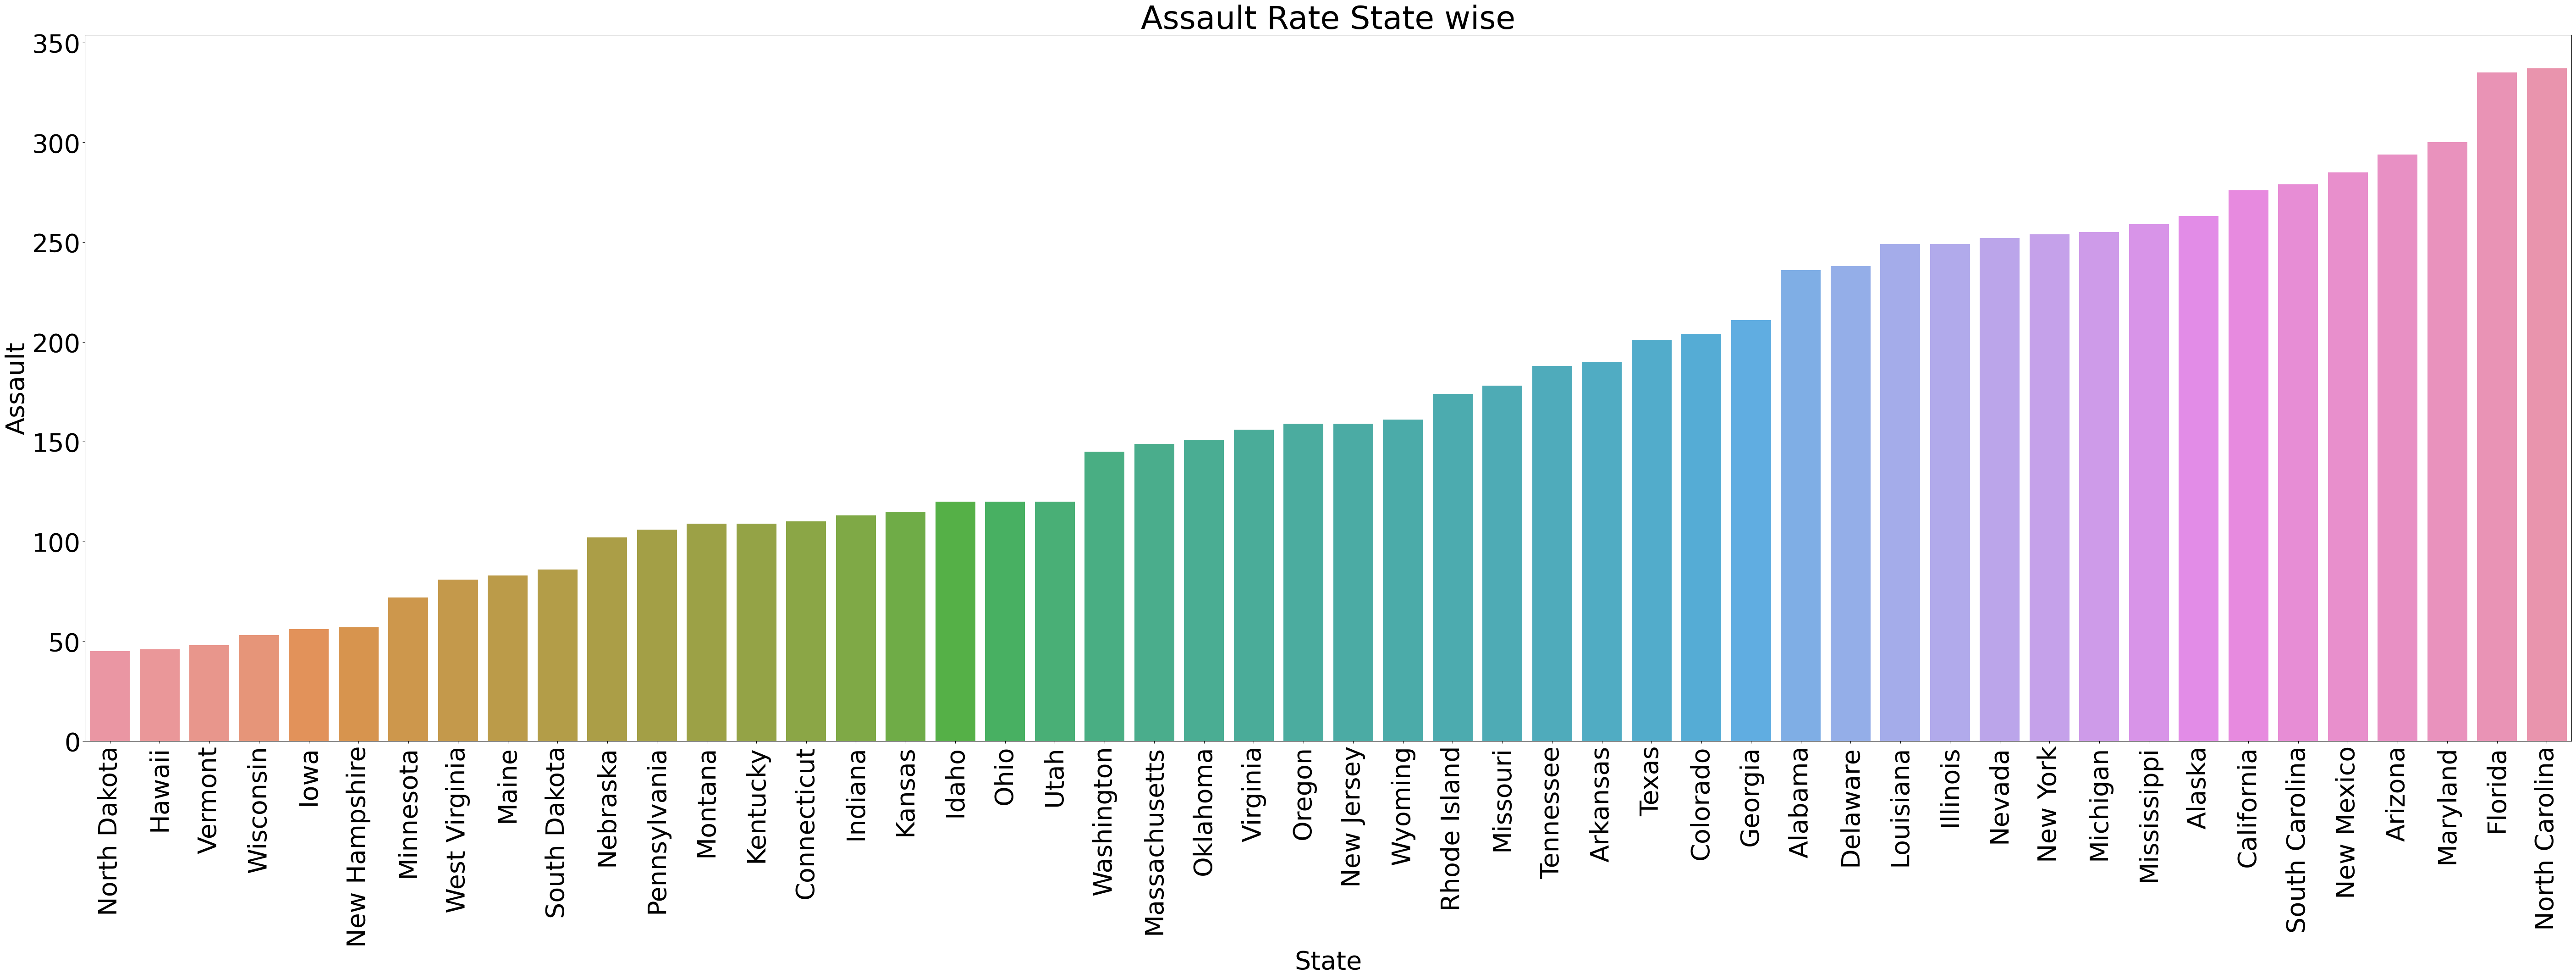

In [78]:
plt.figure(figsize=(70,20))
plt.yticks(rotation = 0, fontsize = 40)
plt.xticks(rotation = 90, fontsize = 40)
sns.barplot(x=df.States, y = df.Assault, order=df.sort_values('Assault').States)
plt.xlabel('State', size=40)
plt.ylabel('Assault', size=40)
plt.title('Assault Rate State wise', size=50)
plt.show()
     
    

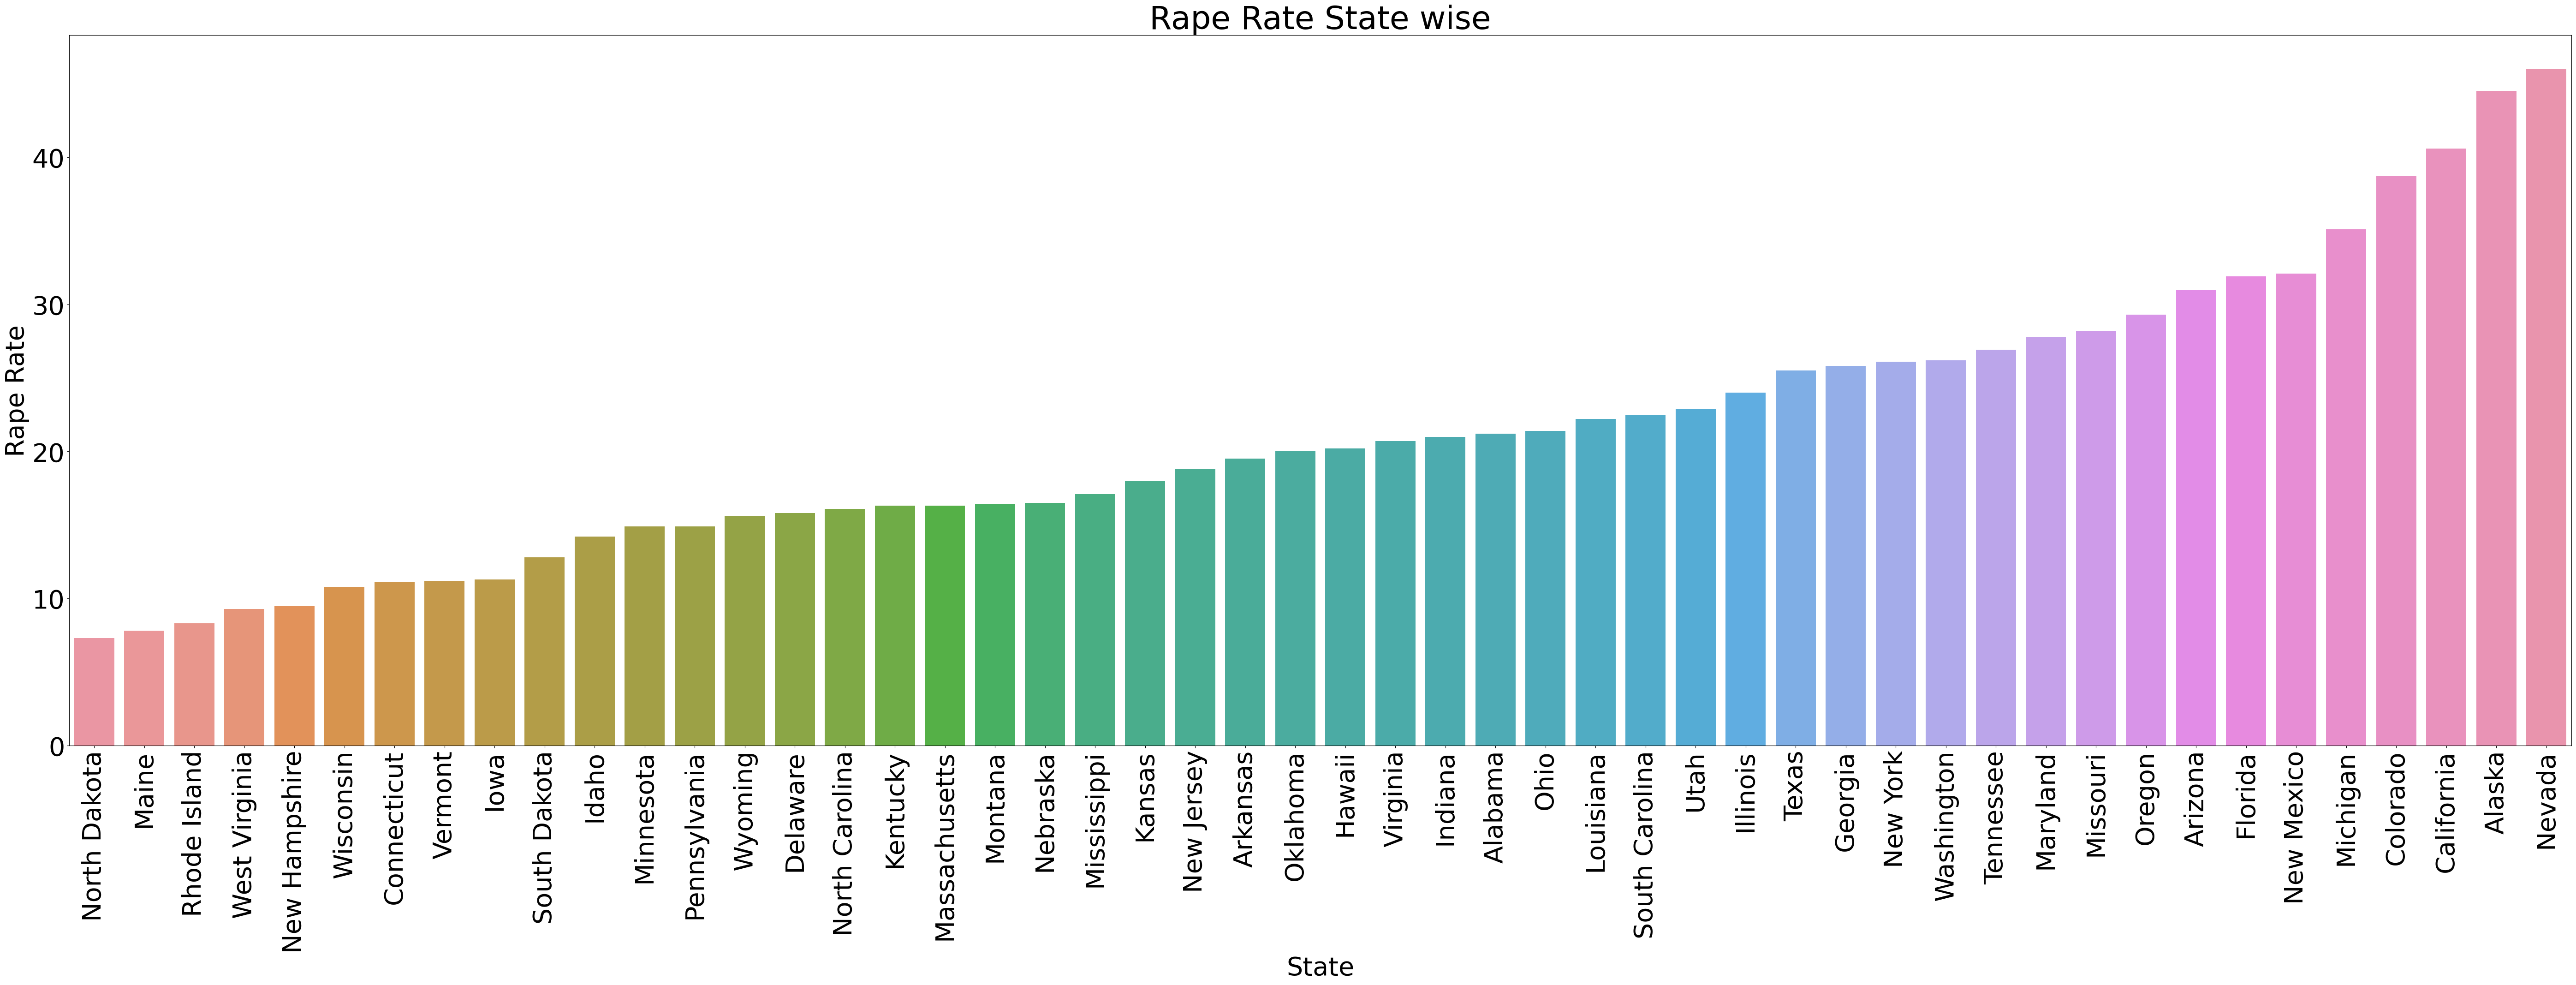

In [79]:
plt.figure(figsize=(70,20))
plt.yticks(rotation = 0, fontsize = 40)
plt.xticks(rotation = 90, fontsize = 40)
sns.barplot(x=df.States, y = df.Rape, order=df.sort_values('Rape').States)
plt.xlabel('State', size=40)
plt.ylabel('Rape Rate', size=40)
plt.title('Rape Rate State wise', size=50)
plt.show()

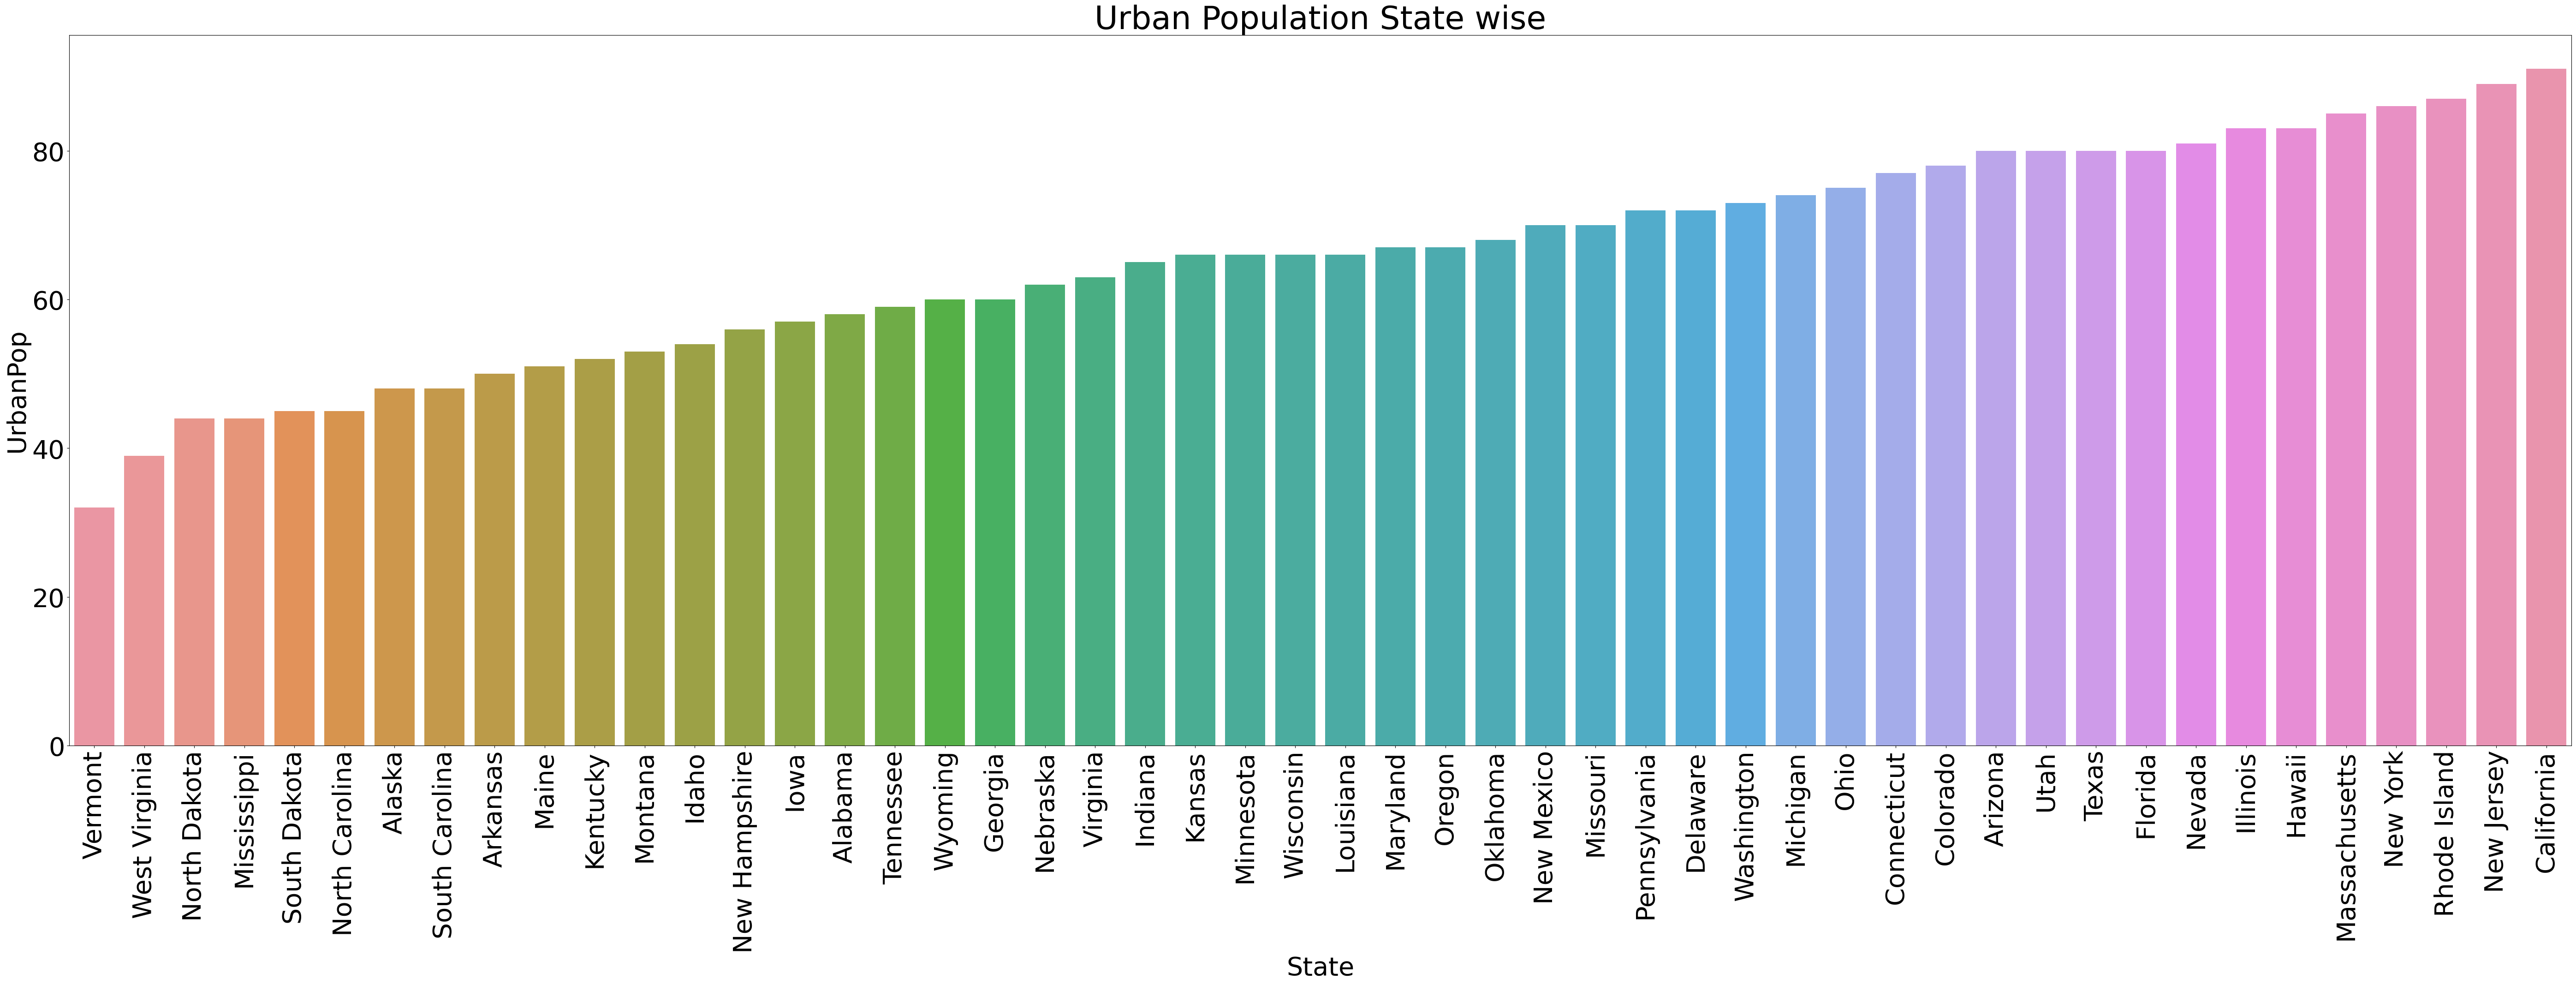

In [80]:
plt.figure(figsize=(70,20))
plt.yticks(rotation = 0, fontsize = 40)
plt.xticks(rotation = 90, fontsize = 40)
sns.barplot(x=df.States, y = df.UrbanPop, order=df.sort_values('UrbanPop').States)
plt.xlabel('State', size=40)
plt.ylabel('UrbanPop', size=40)
plt.title('Urban Population State wise', size=50)
plt.show()

In [81]:
#Outlier Detection

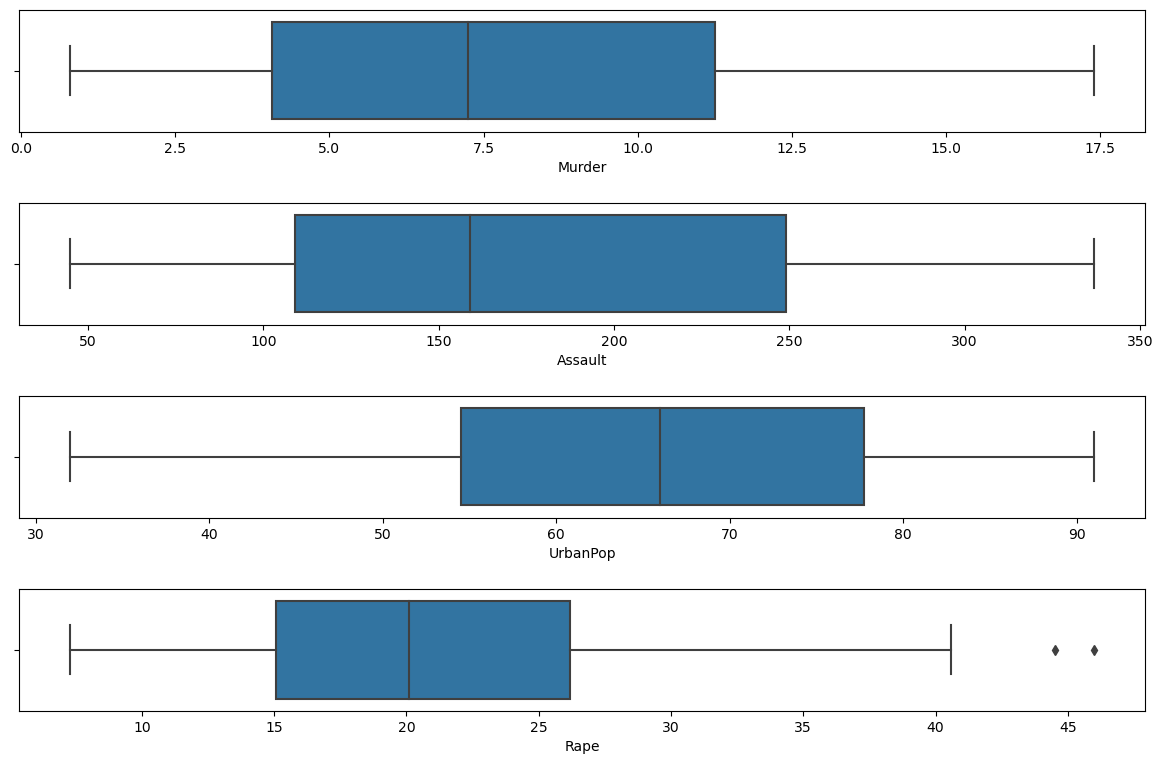

In [82]:
fig, axes=plt.subplots(4,1,figsize=(12,8),sharex=False,sharey=False)
sns.boxplot(x='Murder',data=df,ax=axes[0])
sns.boxplot(x='Assault',data=df,ax=axes[1])
sns.boxplot(x='UrbanPop',data=df,ax=axes[2])
sns.boxplot(x='Rape',data=df,ax=axes[3])
plt.tight_layout(pad=2.0)

C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Rape'>

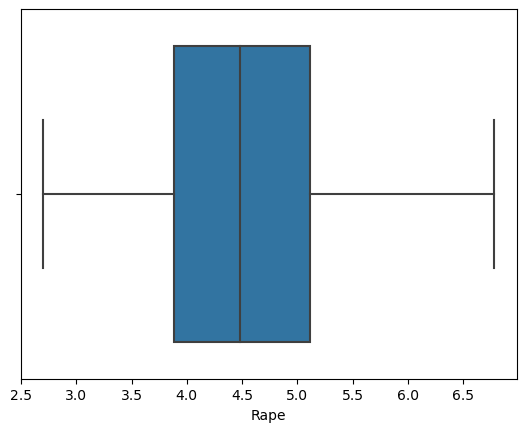

In [83]:
sns.boxplot(np.sqrt(df.Rape))

In [84]:
df.corr()

,Murder,Assault,UrbanPop,Rape
Murder,1.000000,0.801873,0.069573,0.563579
Assault,0.801873,1.000000,0.258872,0.665241
UrbanPop,0.069573,0.258872,1.000000,0.411341
Rape,0.563579,0.665241,0.411341,1.000000


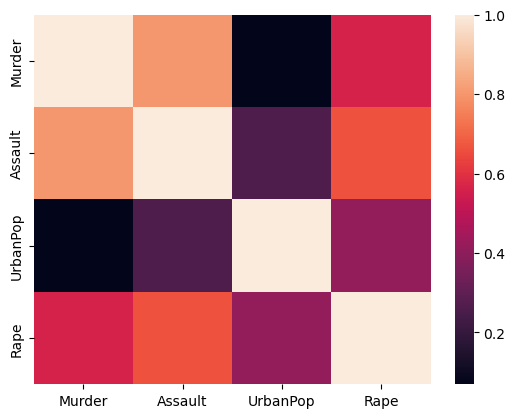

In [85]:

sns.heatmap(df.corr())
plt.show()

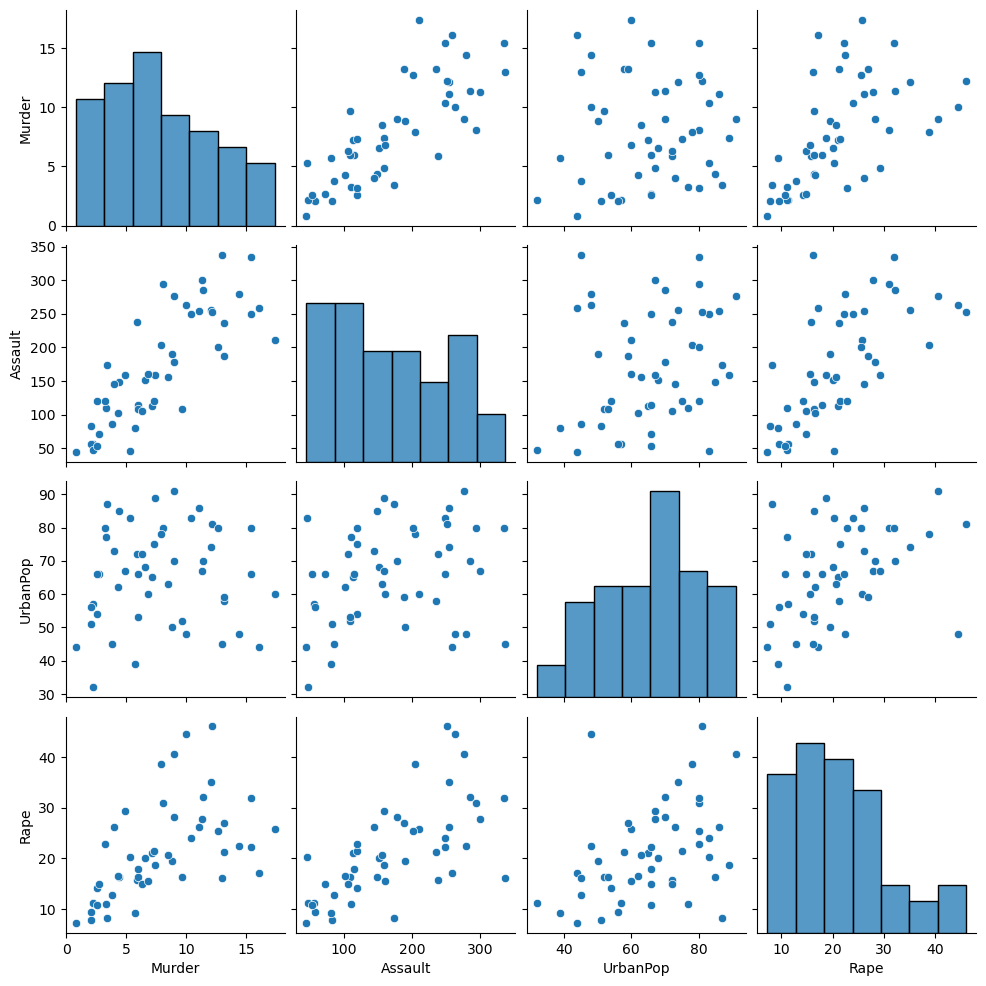

In [86]:
sns.pairplot(df)

In [87]:
#Standardize the data

In [88]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
df1= df.drop(['States'], axis=1)
standard_scaler = StandardScaler()
std_df = standard_scaler.fit_transform(df1)
std_df.shape

(50, 4)

In [89]:
minmax = MinMaxScaler()

minmax_df = minmax.fit_transform(df1)
minmax_df.shape

(50, 4)

In [90]:
# Heirrarchical Clustering

In [91]:
# #create dendrogram

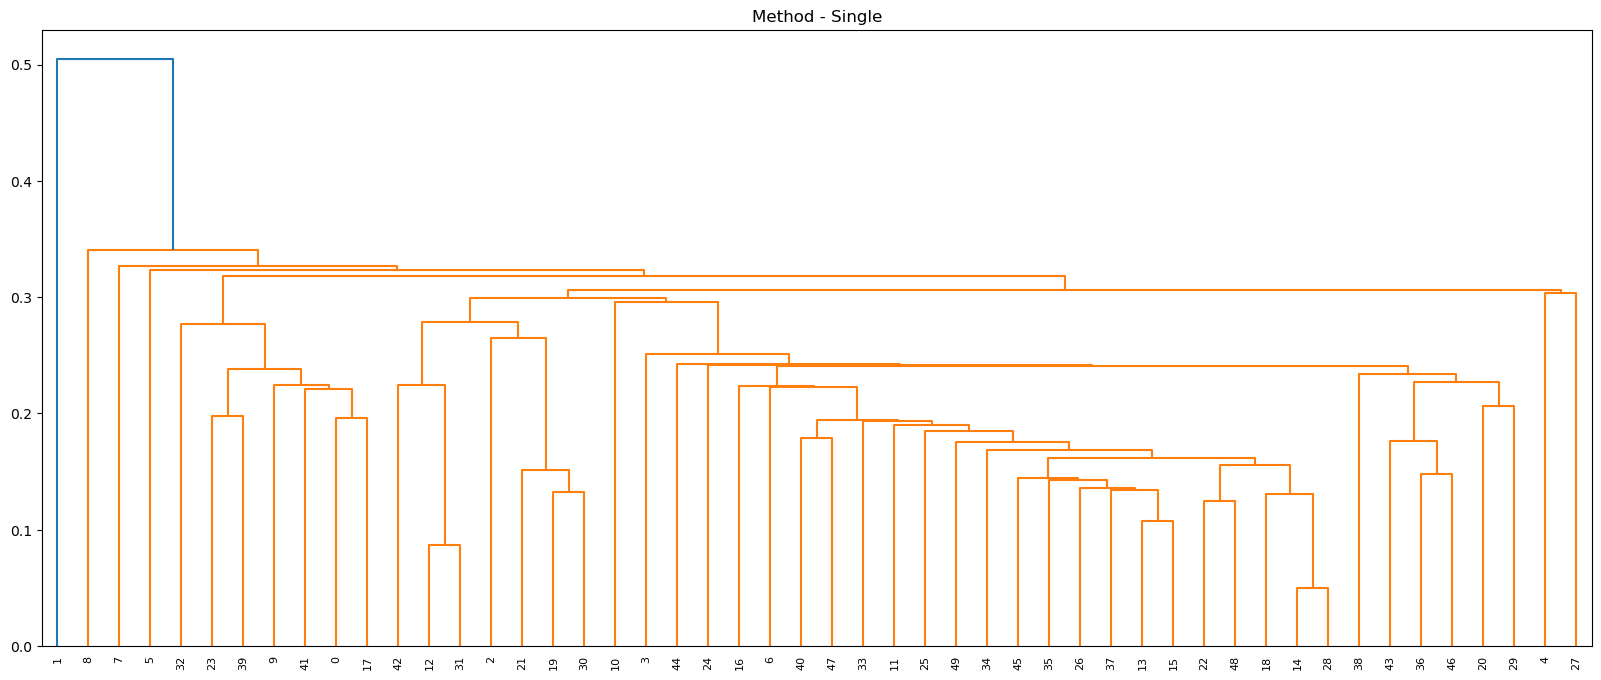

In [92]:
plt.figure(figsize=(20,8))
dendrogram = sch.dendrogram(sch.linkage(minmax_df, method='single'))
plt.title("Method - Single")
plt.show()

In [93]:
#creating clusters method - single

In [94]:
hc_s = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage= 'single')

In [95]:
y_hc = hc_s.fit_predict(minmax_df)
Clusters_s = pd.DataFrame(y_hc, columns=['Cluster'])
     

Clusters_s
     

Clusters_s.value_counts()

C:\Users\admin\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Cluster
0          48
1           1
2           1
dtype: int64

In [96]:
df['h_clusterid'] = Clusters_s
df

,States,Murder,Assault,UrbanPop,Rape,h_clusterid
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,0
5,Colorado,7.9,204,78,38.7,0
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
8,Florida,15.4,335,80,31.9,2
9,Georgia,17.4,211,60,25.8,0


In [97]:
df.groupby('h_clusterid').agg(['mean']).reset_index()

C:\Users\admin\AppData\Local\Temp\ipykernel_12848\2660138374.py:1: FutureWarning: ['States'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df.groupby('h_clusterid').agg(['mean']).reset_index()


,h_clusterid,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,0,7.583333,165.416667,65.604167,20.525
1,1,10.000000,263.000000,48.000000,44.500
2,2,15.400000,335.000000,80.000000,31.900


In [98]:
# Here we can say that states in cluster index 0 are a safer than other 2 clusters, but as we can check in dendrogram in cluster 1 and cluster 2 only 2 states are available which does not give us a valid clarification.

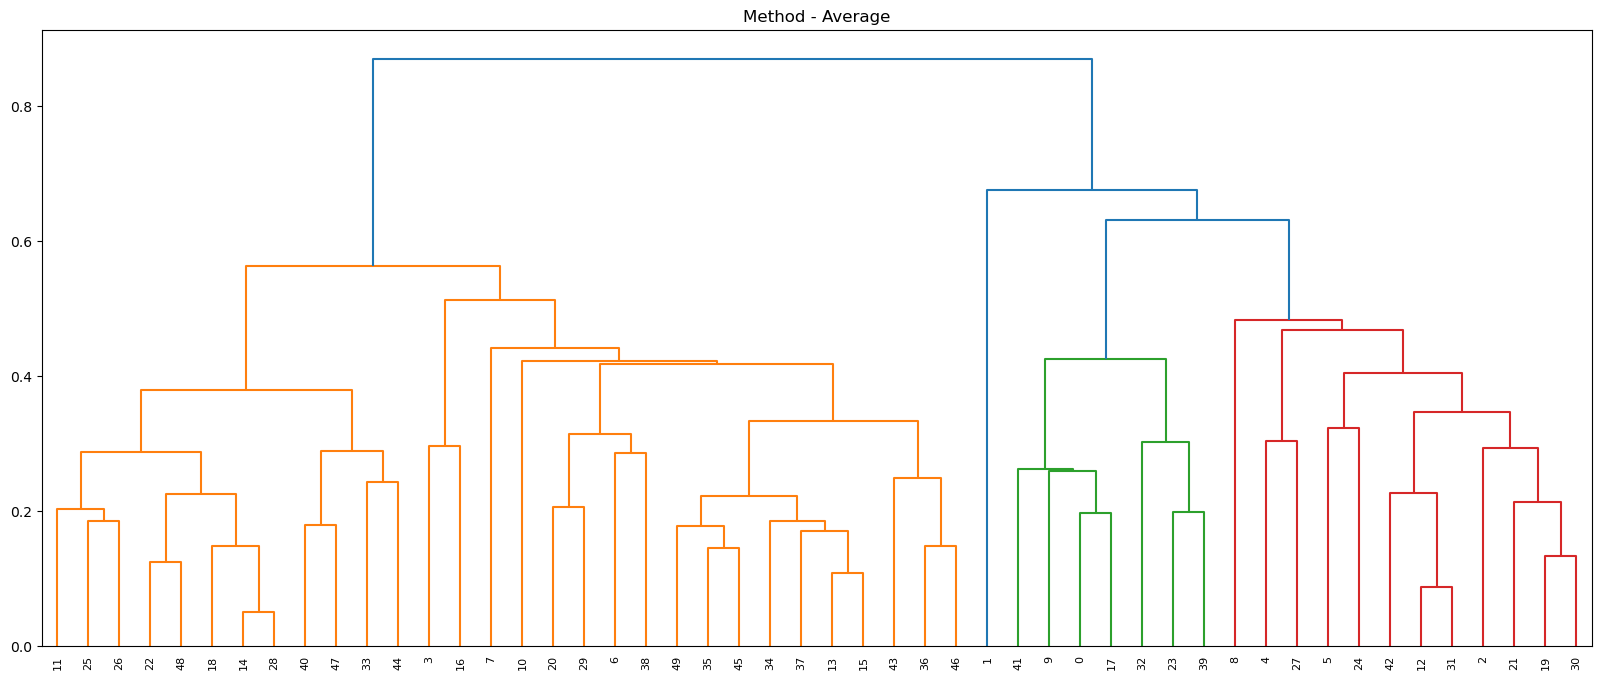

In [99]:
plt.figure(figsize=(20,8))
dendrogram = sch.dendrogram(sch.linkage(minmax_df, method='average'))
plt.title("Method - Average")
plt.show()

In [100]:
#create clusters using method - average

In [101]:
hc_a = AgglomerativeClustering(n_clusters=2, affinity = 'euclidean', linkage= 'average')

In [102]:
y_hc = hc_a.fit_predict(minmax_df)
Clusters_a = pd.DataFrame(y_hc, columns=['Clusters'])
     

Clusters_a
     

df['h_clusterid'] = Clusters_a
Clusters_a.value_counts()
     

C:\Users\admin\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Clusters
1           30
0           20
dtype: int64

In [103]:
df

,States,Murder,Assault,UrbanPop,Rape,h_clusterid
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,0
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,1
4,California,9.0,276,91,40.6,0
5,Colorado,7.9,204,78,38.7,0
6,Connecticut,3.3,110,77,11.1,1
7,Delaware,5.9,238,72,15.8,1
8,Florida,15.4,335,80,31.9,0
9,Georgia,17.4,211,60,25.8,0


In [104]:
df.groupby('h_clusterid').agg(['mean']).reset_index()

C:\Users\admin\AppData\Local\Temp\ipykernel_12848\2660138374.py:1: FutureWarning: ['States'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df.groupby('h_clusterid').agg(['mean']).reset_index()


,h_clusterid,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,0,12.165,255.250000,68.400000,29.165000
1,1,4.870,114.433333,63.633333,15.943333


In [105]:
# Here we can conclude cluster index 1 states are more safer than cluster index 0 states.

# Cluster index 1 has comparitively less urban population than cluster index 0.

#Cluster index 1 has 30 states and cluster index 0 has 20 states.

#So we can say the urban population is affecting the rate of crimes. More the urban population more the crime.

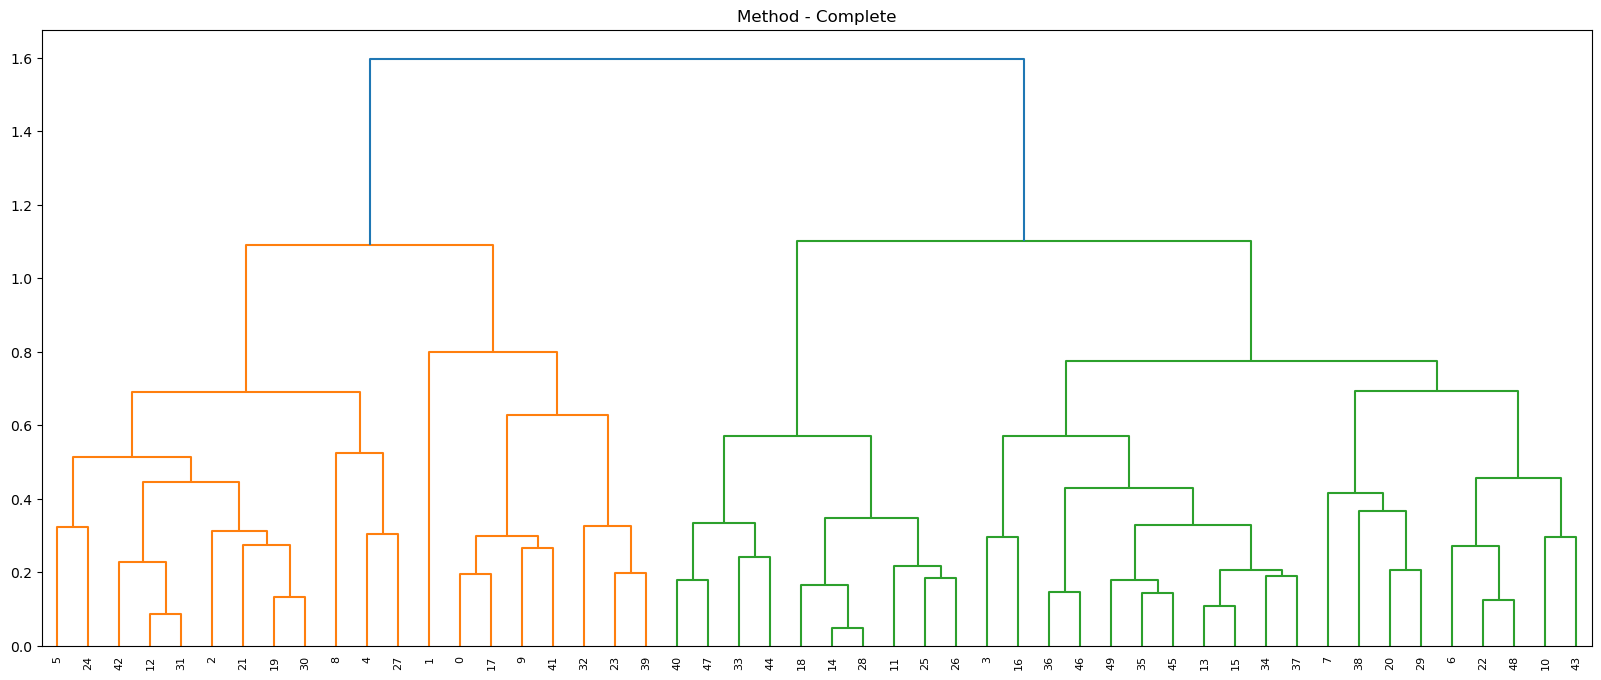

In [106]:
plt.figure(figsize=(20,8))
dendrogram = sch.dendrogram(sch.linkage(minmax_df, method='complete'))
plt.title("Method - Complete")
plt.show()

In [107]:
#create clusters using method - complete

In [108]:
hc_c = AgglomerativeClustering(n_clusters=2, affinity = 'euclidean', linkage= 'complete')

In [109]:
y_hc = hc_c.fit_predict(minmax_df)
Clusters_c = pd.DataFrame(y_hc, columns=['Clusters'])
     

Clusters_c
     

df['h_clusterid'] = Clusters_c
Clusters_c.value_counts()
     

C:\Users\admin\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Clusters
0           30
1           20
dtype: int64

In [110]:
df

,States,Murder,Assault,UrbanPop,Rape,h_clusterid
0,Alabama,13.2,236,58,21.2,1
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,1
5,Colorado,7.9,204,78,38.7,1
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
8,Florida,15.4,335,80,31.9,1
9,Georgia,17.4,211,60,25.8,1


In [111]:
df.groupby('h_clusterid').agg(['mean']).reset_index()
     

C:\Users\admin\AppData\Local\Temp\ipykernel_12848\2725130616.py:1: FutureWarning: ['States'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df.groupby('h_clusterid').agg(['mean']).reset_index()


,h_clusterid,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,0,4.870,114.433333,63.633333,15.943333
1,1,12.165,255.250000,68.400000,29.165000


In [112]:
#Results are almost similar to Average method.

In [113]:
#K-Means CLustering

C:\Users\admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

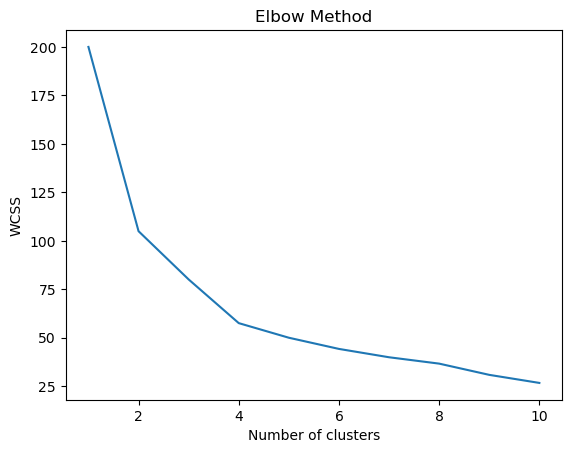

In [114]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
  kmeans = KMeans(n_clusters = i, random_state = 0)
  kmeans.fit(std_df)
  wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [115]:
#To choose any k value between 4-8 would be suitable. But we will go with the lowest i.e 4.

In [116]:
from pandas.core.common import random_state
clusters_new = KMeans(4, random_state=32)
clusters_new.fit(std_df)

C:\Users\admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=32)

In [117]:
clusters_new.labels_

array([2, 3, 3, 2, 3, 3, 0, 0, 3, 2, 0, 1, 3, 0, 1, 0, 1, 2, 1, 3, 0, 3,
       1, 2, 0, 1, 1, 3, 1, 0, 3, 3, 2, 1, 0, 0, 0, 0, 0, 2, 1, 2, 3, 0,
       1, 0, 0, 1, 1, 0])

In [118]:
df1['h_clusterid'] = clusters_new.labels_
df1

,Murder,Assault,UrbanPop,Rape,h_clusterid
0,13.2,236,58,21.2,2
1,10.0,263,48,44.5,3
2,8.1,294,80,31.0,3
3,8.8,190,50,19.5,2
4,9.0,276,91,40.6,3
5,7.9,204,78,38.7,3
6,3.3,110,77,11.1,0
7,5.9,238,72,15.8,0
8,15.4,335,80,31.9,3
9,17.4,211,60,25.8,2


In [119]:
df1.groupby('h_clusterid').agg(['mean']).reset_index()

,h_clusterid,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,0,5.852941,141.176471,73.647059,19.335294
1,1,3.600000,78.538462,52.076923,12.176923
2,2,13.937500,243.625000,53.750000,21.412500
3,3,10.966667,264.000000,76.500000,33.608333


In [120]:
#Here we can conclude that states in cluster 1 are safer than other 3 clusters.

#Also the urban population in cluster 1 states is less compared to other clusters.

#Here also we can conclude that the urban population is affecting the rate of crime. 

In [121]:
#DBSCAN

In [122]:
from sklearn.cluster import DBSCAN

In [125]:
df_d = pd.read_csv(r"C:\Users\admin\Desktop\Excelr Assignments\Assignment 10\crime_data.csv")
df_d

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [126]:
dbscan = DBSCAN(eps = 1.25, min_samples=3)
dbscan.fit(std_df)

DBSCAN(eps=1.25, min_samples=3)

In [127]:
dbscan.labels_

array([ 0, -1,  1,  1, -1,  1,  1,  1, -1,  0,  1,  1,  1,  1,  1,  1,  1,
        0,  1,  1,  1,  1,  1,  0,  1,  1,  1, -1,  1,  1,  1,  1,  0,  1,
        1,  1,  1,  1,  1,  0,  1,  0,  1,  1,  1,  1,  1,  1,  1,  1],
      dtype=int64)

In [128]:
cl = pd.DataFrame(dbscan.labels_, columns=['clusters'])
cl

,clusters
0,0
1,-1
2,1
3,1
4,-1
5,1
6,1
7,1
8,-1
9,0


In [129]:
df_d=pd.concat([df_d,cl], axis=1)
df_d

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clusters
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,-1
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,1
4,California,9.0,276,91,40.6,-1
5,Colorado,7.9,204,78,38.7,1
6,Connecticut,3.3,110,77,11.1,1
7,Delaware,5.9,238,72,15.8,1
8,Florida,15.4,335,80,31.9,-1
9,Georgia,17.4,211,60,25.8,0


In [130]:
df_d['clusters'].value_counts()

 1    39
 0     7
-1     4
Name: clusters, dtype: int64

In [131]:
#clusters by DBSCAN

In [132]:
df_d.groupby('clusters').agg(['mean']).reset_index()

C:\Users\admin\AppData\Local\Temp\ipykernel_12848\3952313966.py:1: FutureWarning: ['Unnamed: 0'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df_d.groupby('clusters').agg(['mean']).reset_index()


,clusters,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,-1,11.650000,281.500000,75.000000,40.750000
1,0,14.671429,251.285714,54.285714,21.685714
2,1,6.156410,144.948718,66.589744,19.148718


In [133]:
# From DBSCAN we can check for outliers. And after trial and errors on min-samples and eps value, we chose eps = 1.25 and min_samples = 3.

# We got 4 states in outliers.

# And the clusters 0 & 1 each having 7 & 39 states respectively.

# We can conlcude from here that cluster 1 states are safer than cluster 0.